In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pymongo import MongoClient
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder  

In [7]:
client=MongoClient("mongodb://localhost:27017/") 
db = client["endterm"]
collection = db["data"]

In [11]:
data=list(collection.find())
df=pd.DataFrame(data)
if "_id" in df.columns:
    df.drop(columns=["_id"], inplace=True)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
print(df.isnull().sum())
df.dropna(inplace=True)


id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


id                           int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

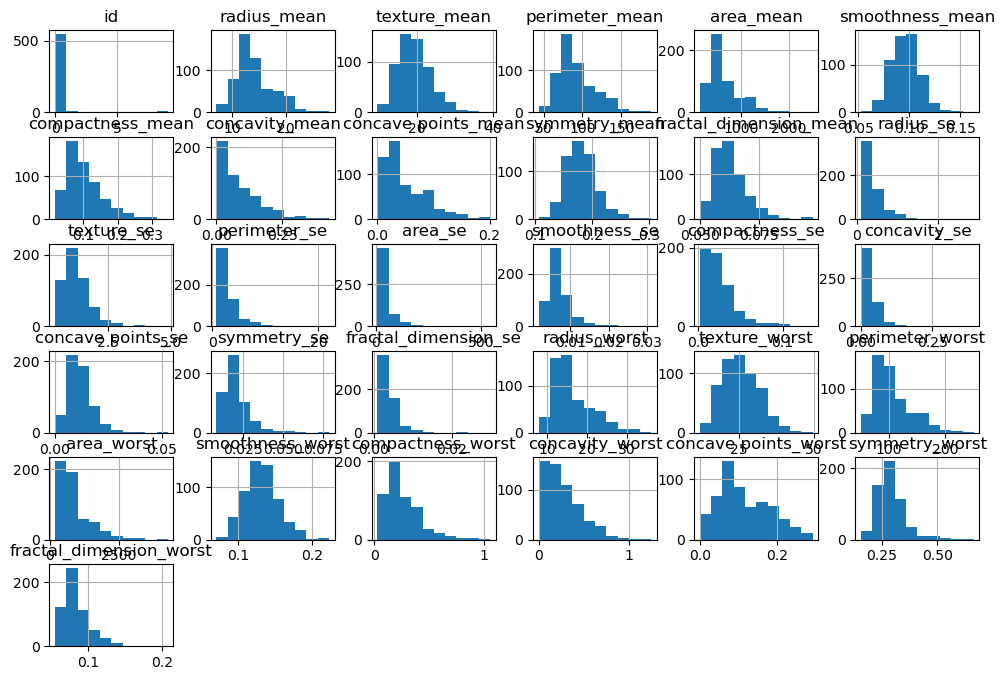

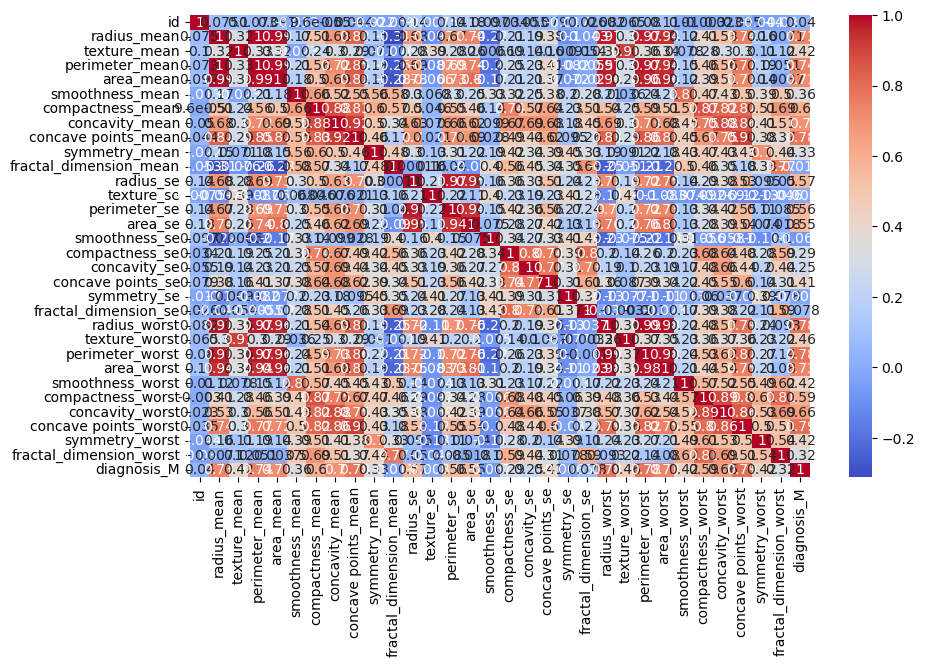

In [23]:
print(df.dtypes)  
df = pd.get_dummies(df, drop_first=True)
df.hist(figsize=(12, 8))
plt.show()
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [25]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [41]:
from sklearn.metrics import accuracy_score, classification_report
print(df.columns)
X = df.drop("diagnosis_M", axis=1)
y = df["diagnosis_M"]
iencoder = LabelEncoder()
y = encoder.fit_transform(y)
print("Category:", encoder.classes_) 

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis_M'],
      dtype='object')
Category: [False  True]


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(penalty=None, max_iter=1000)
log_reg.fit(X_train, y_train)
log_reg_l1 = LogisticRegression(penalty="l1", solver="liblinear", max_iter=1000)
log_reg_l1.fit(X_train, y_train)
log_reg_l2 = LogisticRegression(penalty="l2", solver="lbfgs", max_iter=1000)
log_reg_l2.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print( accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9473684210526315
              precision    recall  f1-score   support

           0       0.99      0.93      0.96        71
           1       0.89      0.98      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
param_grid_knn = {"n_neighbors": [3, 5, 7, 9, 11],
                  "weights": ["uniform", "distance"],
                  "metric": ["euclidean", "manhattan"]}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring="accuracy", n_jobs=-1)
grid_knn.fit(X_train, y_train)
print( grid_knn.best_params_)
print( grid_knn.best_score_)

{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.9626373626373628


In [59]:
from sklearn.svm import SVC
param_grid_svm = {"C": [0.1, 1, 10, 100],
                  "kernel": ["linear", "rbf", "poly"],
                  "gamma": ["scale", "auto"]}

grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring="accuracy", n_jobs=-1)
grid_svm.fit(X_train, y_train)

print( grid_svm.best_params_)
print( grid_svm.best_score_)

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.9758241758241759


In [61]:
from sklearn.tree import DecisionTreeClassifier
param_grid_tree = {"max_depth": [3, 5, 10, None],
                   "min_samples_split": [2, 5, 10],
                   "min_samples_leaf": [1, 2, 4]}

grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_tree, cv=5, scoring="accuracy", n_jobs=-1)
grid_tree.fit(X_train, y_train)

print( grid_tree.best_params_)
print( grid_tree.best_score_)

{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
0.9362637362637363


/var/folders/jj/_83b2y215bv5_bt2j4m4jvl00000gp/T/ipykernel_33869/1844313448.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=features, palette="viridis")


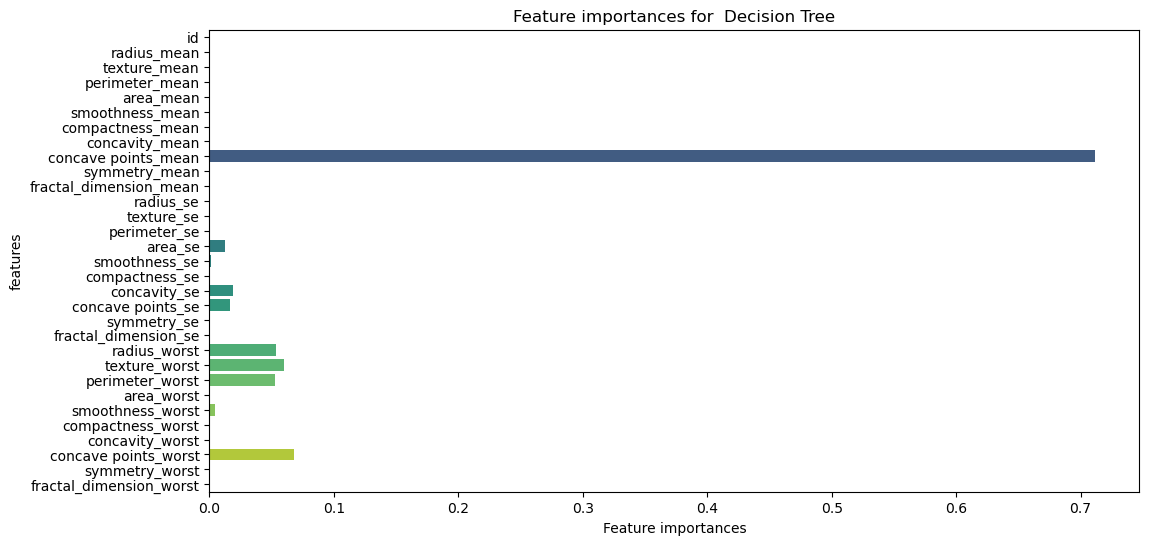

In [63]:
best_tree = grid_tree.best_estimator_
feature_importances = best_tree.feature_importances_
features = X.columns
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances, y=features, palette="viridis")
plt.xlabel("Feature importances")
plt.ylabel("features")
plt.title("Feature importances for  Decision Tree")
plt.show()

0.9736842105263158
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



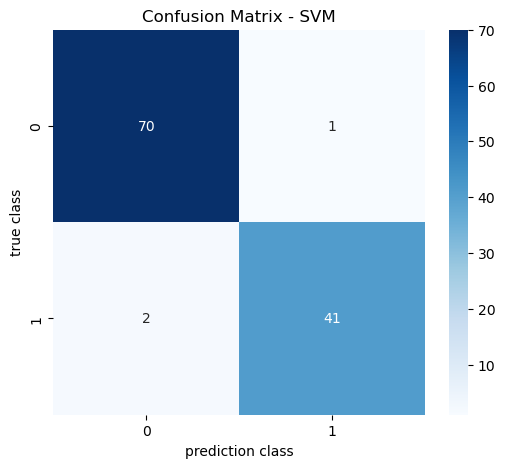

In [65]:
from sklearn.metrics import confusion_matrix
best_svm = grid_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)
print( accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("prediction class")
plt.ylabel("true class")
plt.title("Confusion Matrix - SVM")
plt.show()

In [67]:
from sklearn.metrics import  precision_score, recall_score, f1_score
y_pred = best_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9737
Precision: 0.9762
Recall: 0.9535
F1-score: 0.9647


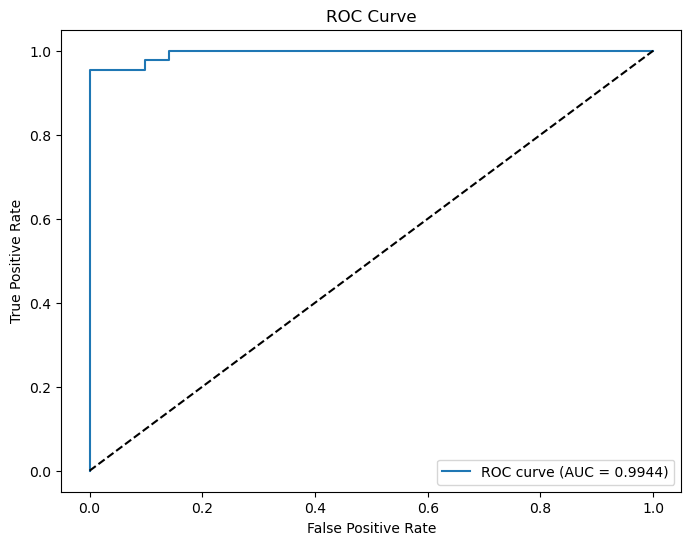

AUC (Area Under Curve): 0.9944


In [71]:
from sklearn.metrics import roc_curve, auc
y_probs = best_svm.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
print(f"AUC (Area Under Curve): {roc_auc:.4f}")

In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    "Logistic Regression (L1)": log_reg_l1,
    "Logistic Regression (L2)": log_reg_l2,
    "KNN": knn,
    "Decision Tree": best_tree
}
results = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append([name, accuracy, precision, recall, f1])
df_results = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-score"])

df_results

,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression (L1),0.973684,0.954545,0.976744,0.965517
1,Logistic Regression (L2),0.973684,0.976190,0.953488,0.964706
2,KNN,0.947368,0.930233,0.930233,0.930233
3,Decision Tree,0.947368,0.951220,0.906977,0.928571


📌 Model: Logistic Regression (L1)
Accuracy: 0.9737
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



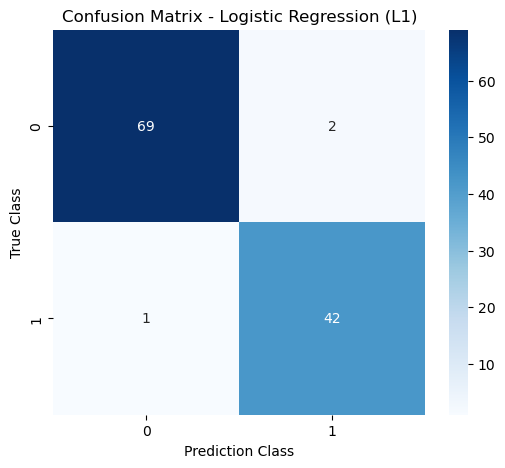

📌 Model: Logistic Regression (L2)
Accuracy: 0.9737
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



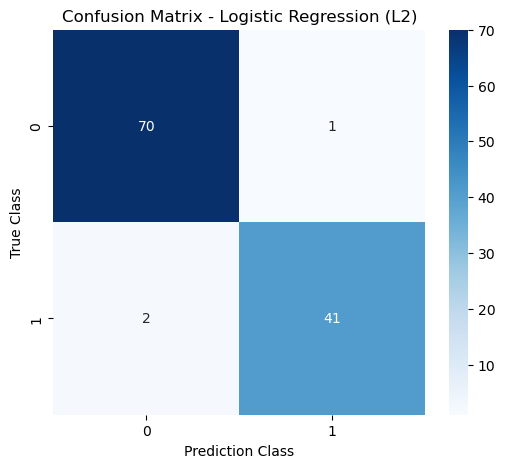

📌 Model: KNN
Accuracy: 0.9474
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



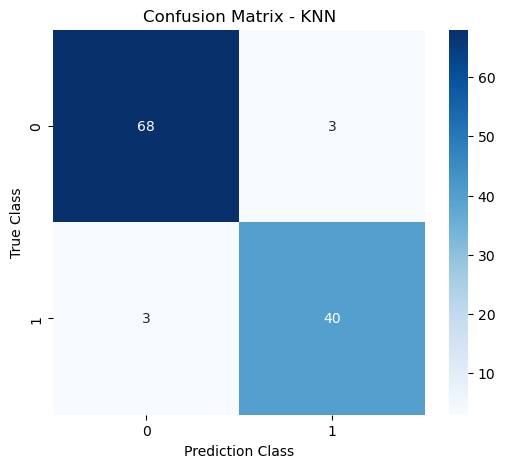

📌 Model: Decision Tree
Accuracy: 0.9474
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        71
           1       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



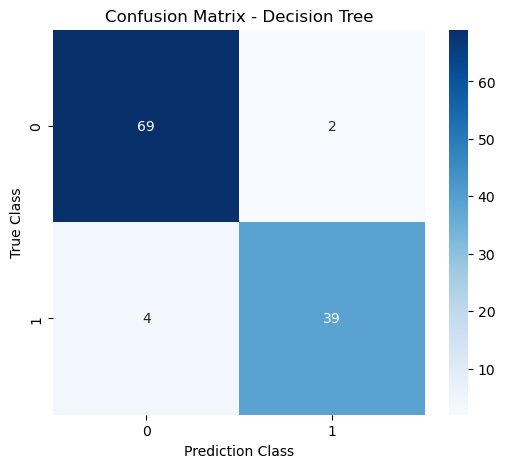

In [83]:
models = {
    "Logistic Regression (L1)": log_reg_l1,
    "Logistic Regression (L2)": log_reg_l2,
    "KNN": knn,
    "Decision Tree": best_tree
}
for name, model in models.items():
    y_pred = model.predict(X_test)
    
    print(f"📌 Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Prediction Class")
    plt.ylabel("True Class")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

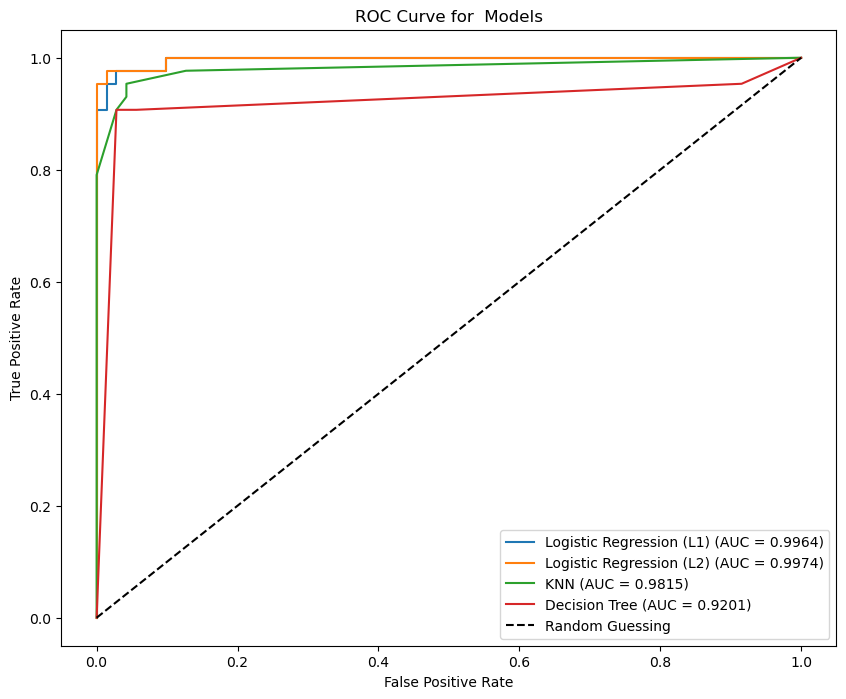

In [89]:
models = {
    "Logistic Regression (L1)": log_reg_l1,
    "Logistic Regression (L2)": log_reg_l2,
    "KNN": knn,
    "Decision Tree": best_tree
}
plt.figure(figsize=(10, 8))

for name, model in models.items():
    y_probs = model.predict_proba(X_test)[:, 1]  
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for  Models")
plt.legend()
plt.show()

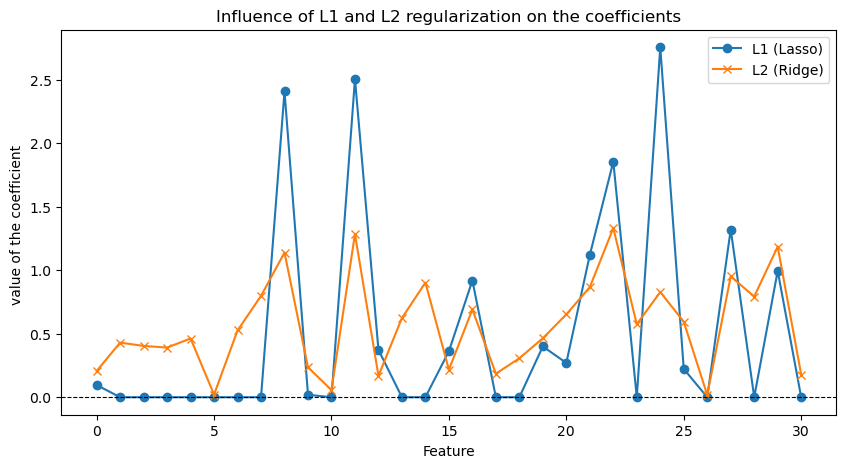

In [97]:
results = {
    "Model": ["Logistic Regression (L1)", "Logistic Regression (L2)", "KNN", "SVM (RBF)", "Decision Tree"],
    "Accuracy": [0.973684, 0.973684, 0.947368, 0.9737, 0.947368],  
    "Precision": [0.954545, 0.976190, 0.930223, 0.9762, 0.951220],  
    "Recall": [0.976744, 0.953488, 0.930233, 0.9535, 0.906977], 
    "F1-score": [0.965517, 0.964706, 0.930233, 0.9647, 0.928571], 
    "AUC": [0.9964, 0.9974, 0.9815, 0.9944, 0.9201]  
}
df_results = pd.DataFrame(results)
df_results
coef_l1 = log_reg_l1.coef_.flatten()
coef_l2 = log_reg_l2.coef_.flatten()
plt.figure(figsize=(10, 5))
plt.plot(np.abs(coef_l1), label="L1 (Lasso)", marker='o')
plt.plot(np.abs(coef_l2), label="L2 (Ridge)", marker='x')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
plt.xlabel("Feature")
plt.ylabel("value of the coefficient ")
plt.legend()
plt.title("Influence of L1 and L2 regularization on the coefficients")
plt.show()